In [12]:
pip install ydata-profiling
pip install numpy

In [14]:
import pandas as pd
import numpy as np
from ydata_profiling import ProfileReport

red_wine = pd.read_csv('/content/red_wine.csv')

# Create profile
profile = ProfileReport(red_wine, title='Red Wine Profiling Report')


profile.to_file('red_wine_profile.html')

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]


100%|██████████| 4/4 [00:00<00:00,  9.92it/s]


Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [3]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_auc_score, accuracy_score, make_scorer
from sklearn.preprocessing import LabelEncoder


le = LabelEncoder()
X = red_wine[['citric acid', 'sulphates', 'alcohol']]
y = le.fit_transform(red_wine['type'])

In [4]:
from sklearn.dummy import DummyClassifier

# Majority class baseline
baseline_majority = DummyClassifier(strategy='most_frequent')

In [5]:
def evaluate_model(model, X, y):
    auc_scores = cross_val_score(model, X, y, cv=10, scoring='roc_auc')
    acc_scores = cross_val_score(model, X, y, cv=10, scoring='accuracy')
    return np.mean(auc_scores), np.mean(acc_scores)

In [22]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

models = {
    'Baseline': baseline_majority,
    'Logistic Regression': LogisticRegression(),
    'Naive Bayes': GaussianNB(),
    'Decision Tree': DecisionTreeClassifier(),
    'SVM-Linear': SVC(kernel='linear', probability=True),
    'SVM-RBF': SVC(kernel='rbf', probability=True),
    'Random Forest': RandomForestClassifier()
}

results = {}
for name, model in models.items():
    auc, acc = evaluate_model(model, X, y)
    results[name] = {'AUC': auc, 'Accuracy': acc}

x = pd.DataFrame(results)
print(x)

          Baseline  Logistic Regression  Naive Bayes  Decision Tree  \
AUC       0.500000             0.879902     0.895408       0.753343   
Accuracy  0.528887             0.784785     0.821627       0.744495   

          SVM-Linear   SVM-RBF  Random Forest  
AUC         0.881489  0.868920       0.887008  
Accuracy    0.791863  0.535844       0.791894  


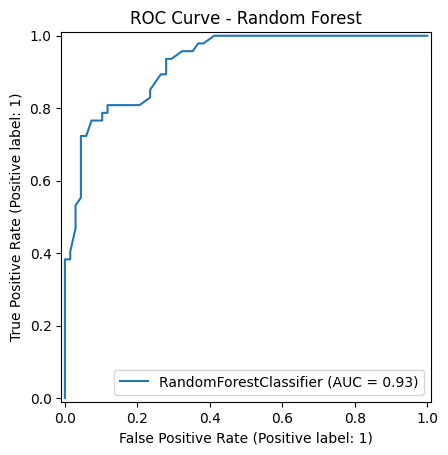

In [16]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve, RocCurveDisplay
import matplotlib.pyplot as plt

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Train Random Forest
rf = RandomForestClassifier()
rf.fit(X_train, y_train)

# Plot ROC
RocCurveDisplay.from_estimator(rf, X_test, y_test)
plt.title('ROC Curve - Random Forest')
plt.show()

In [17]:
white_wine = pd.read_csv('/content/white_wine.csv')
X_white = white_wine[['citric acid', 'sulphates', 'alcohol']]
y_white = le.transform(white_wine['type'])

In [23]:
best_model = max(results.items(), key=lambda x: x[1]['AUC'])[0]
if best_model == 'Random Forest':
    model = RandomForestClassifier()


model.fit(X, y)
y_pred = model.predict_proba(X_white)[:, 1]
white_auc = roc_auc_score(y_white, y_pred)
print(f"AUC on white wine: {white_auc}")

AUC on white wine: 0.9638379942140791
